In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0, 0.5, 'frequency')

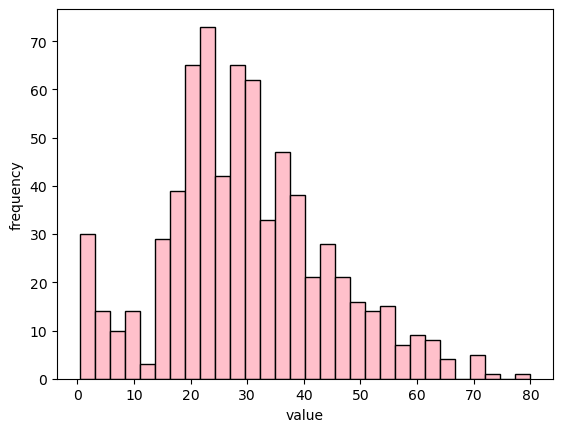

In [7]:
plt.hist(x=df['Age'],bins=30,color='pink',edgecolor='black')
plt.xlabel("value")
plt.ylabel("frequency")

<Axes: xlabel='Survived', ylabel='Age'>

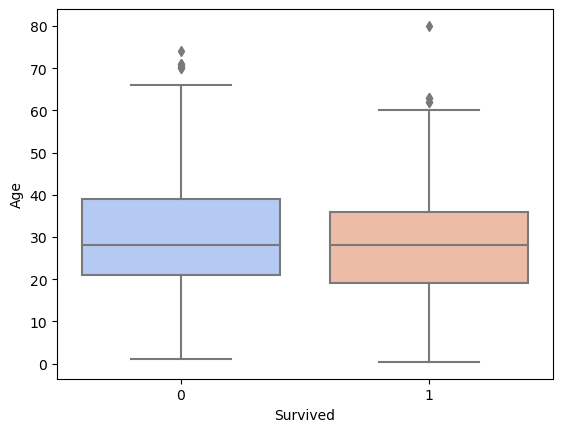

In [8]:
sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')

<Axes: xlabel='Survived', ylabel='Age'>

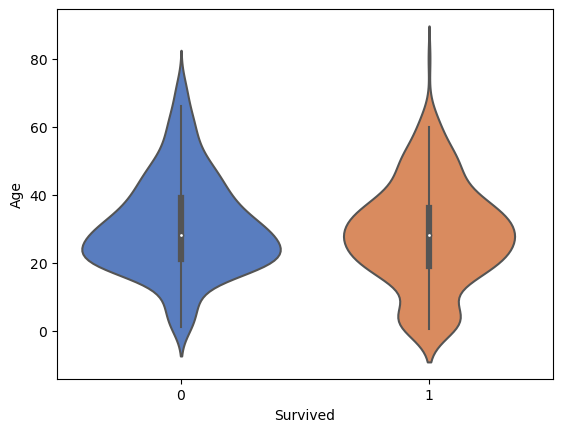

In [9]:
sns.violinplot(x='Survived', y='Age', data=df, palette='muted')

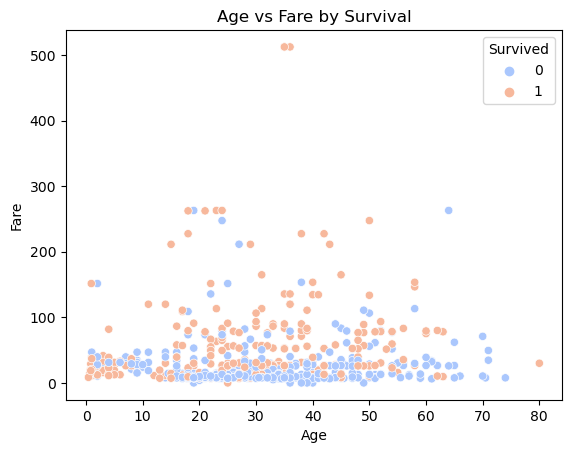

In [10]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [11]:
# From these I can see that the middle age people were the one who survived the most and didn't suvive as well. So i"m gonna add the mean of the age to the empty values in the age column

In [12]:
df['Age'].mean().round()

30.0

In [13]:
df['Age']=df['Age'].fillna(value=df['Age'].mean())

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df[['Survived','Embarked']].groupby('Embarked').sum()

,Survived
Embarked,
C,93
Q,30
S,217


In [16]:
df[['Cabin']].groupby('Cabin').count()

""
Cabin
A10
A14
A16
A19
A20
...
F33
F38
F4


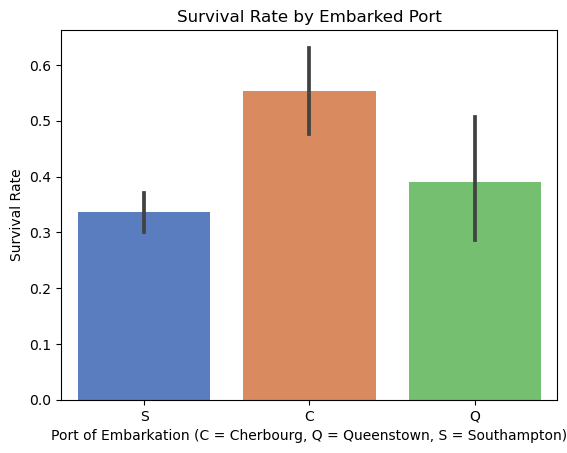

In [17]:
sns.barplot(x='Embarked', y='Survived', data=df, palette='muted')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.show()

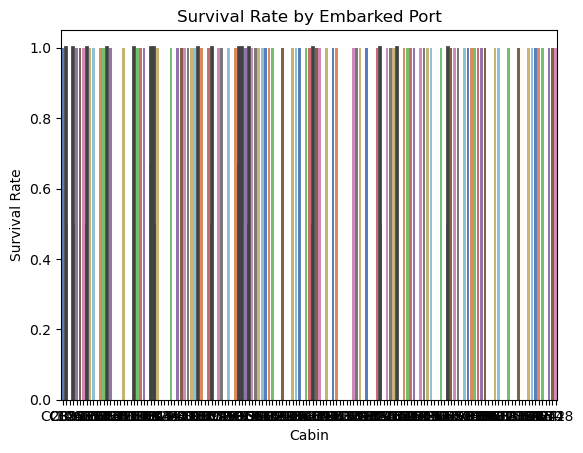

In [18]:
sns.barplot(x='Cabin', y='Survived', data=df, palette='muted')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Cabin')
plt.ylabel('Survival Rate')
plt.show()

In [53]:
#Kepping name,cabin,ticket and embarkment point makes no sense with the relevant data..so dropping them

In [20]:
df=df.drop(labels=['Name','Ticket','Embarked','Cabin'],axis=1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


<Axes: xlabel='Sex', ylabel='Survived'>

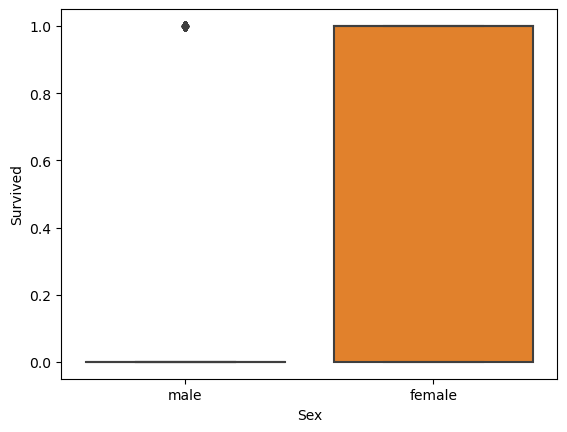

In [22]:
sns.boxplot(data=df,x='Sex',y='Survived')

In [23]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
dtype: int64

In [24]:
#Replacing values of male with 0 and females with 1
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [26]:
df[df['Sex'] == 0]['Survived'].sum()

109

<Axes: xlabel='Survived', ylabel='Sex'>

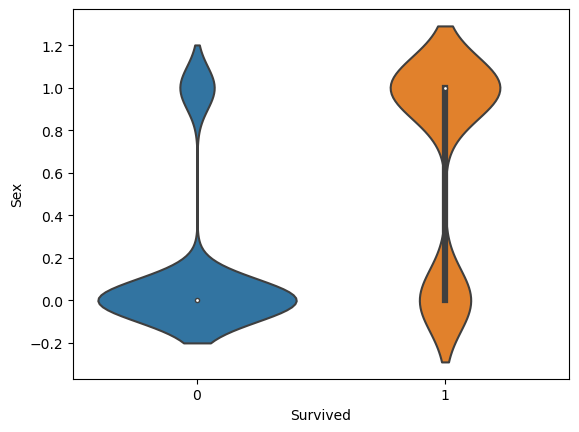

In [27]:
sns.violinplot(data=df,x='Survived',y='Sex')

In [28]:
# Most of the females survived, while most of the males dies

In [29]:
#Keeping passengerid doesn't makes snese, so dorpping that as well

In [30]:
df=df.drop(labels='PassengerId',axis=1)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [32]:
#Now dividing the df into x lables and y lables

In [33]:
X=df.drop(labels='Survived',axis=1)

In [34]:
y=df.Survived

In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,3,1,29.699118,1,2,23.4500
889,1,0,26.000000,0,0,30.0000


In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [38]:
dTreeClassifier=DecisionTreeClassifier() 

In [53]:
## This is based on Gini as default value is Gini for criterion

In [39]:
dTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=dTreeClassifier.predict(X_valid)

In [43]:
accuracyscore=accuracy_score(y_pred,y_valid)

In [45]:
print("Accuracy score = "+ str(accuracyscore))

Accuracy score = 0.7932960893854749


In [46]:
#Error Rate
print('Error rate = '+str(1-accuracyscore))

Error rate = 0.2067039106145251


In [50]:
gini_tree = DecisionTreeClassifier(criterion='gini')
gini_scores = cross_val_score(gini_tree, X, y, cv=5, scoring='accuracy')

# Decision Tree with Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_scores = cross_val_score(entropy_tree, X, y, cv=5, scoring='accuracy')

In [51]:
print( gini_scores )

[0.69832402 0.79213483 0.80898876 0.74719101 0.78089888]


In [52]:
print(entropy_scores)

[0.74301676 0.79213483 0.79775281 0.75842697 0.7752809 ]
